In [1]:
import freyberg_trial_and_error as freymod
import pyemu
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
freymod.setup_model()

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'ibound.ref', 'inschek', 'inschek.exe', 'kzone.ref', 'mf2005', 'mf2005.exe', 'mfnwt', 'mp6', 'mp6.exe', 'mpath.in', 'pest++.exe', 'pestchek', 'pestchek.exe', 'pestpp', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'sweep', 'sweep.exe', 'tempchek', 'tempchek.exe', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_trialerror
FloPy is using the fol

In [3]:
freymod.setup_pest()

Starting to read HYDMOD data from freyberg.hyd.bin
Starting to read HYDMOD data from freyberg.hyd.bin.truth


In [6]:
#freymod.run_respsurf()

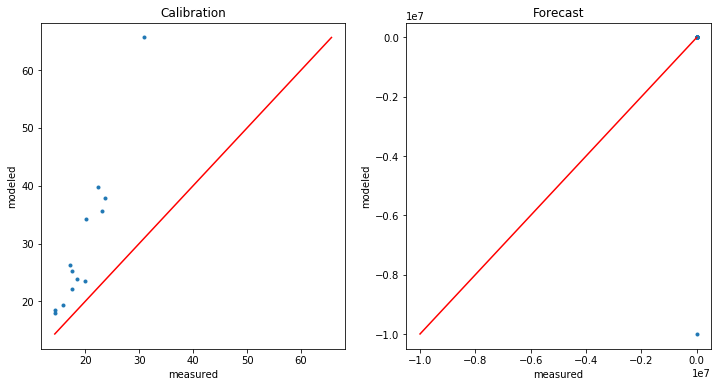

In [10]:
freymod.rerun_new_pars(1.1,1)

In [10]:
w=widgets.interactive(f, 
                      hk1=widgets.FloatSlider(value=1.5,min=1.0,max=10.0, step=0.25,continuous_update=False),
                      rch_0=widgets.FloatSlider(value=1.15,min=0.75,max=1.25,step=0.1,continuous_update=False))
display(w)